# Assignment 2: Backpropagation


---

본 과제에서는 RNN의 backpropagation을 직접 구현합니다. 




## 1. Recurrent Neural Networks

Recurrent Neural Networks (RNNs) 은 가변적인 길이의 시퀀스를 다룰 수 있는 신경망의 한 종류입니다. 보통 다음과 같은 점화식으로 정의되어 가변적인 길이의 시퀀스를 다룰 수 있습니다. 
$$S_k = f(S_{k-1} \cdot W_{rec} + X_k \cdot W_x)$$

여기에서 $S_k$는 $k$ 시점에서의 상태를 의미하고, $X_k$는 $k$ 시점에서의 input을,  $W_{rec}$과 $W_x$는 feedforward 신경망의 학습 가능한 파라미터를 의미합니다.

상태 $S_k$는 점화식에 의해 시간에 따라 변하게 되고, 피드백 루프를 통해 해당 상태로 다시 다음 시점의 상태로 반영되게 됩니다. 이러한 피드백 과정을 통해 모델은 이전 시점의 정보를 기억할 수 있습니다. $k$ 시점에서의 최종적인 output $Y_k$는 하나 이상의 상태들로부터 계산될 수 있습니다.


## 2. Linear Recurrent Neural Network

본 과제에서는 이진 시퀀스 input 을 받아 마지막 상태에서 전체 1의 개수를 output 하는 간단한 RNN을 학습시킵니다. 물론 간단한 작업이기 때문에 코드 한 줄로 해결할 수 있지만, RNN의 backpropagation을 구현하고 확인하는 목적으로 사용합니다. 

본 과제에서 사용할 RNN의 구조를 다음과 같이 묘사할 수 있습니다. 그림의 왼쪽 부분은 $s_k = s_{k-1} \cdot w_{rec} + x_k \cdot w_x$ 의 점화식을 묘사한 것이고, 그림의 오른쪽은 길이 $n$의 시퀀스를 시간에 따라 펼친 모습입니다.  
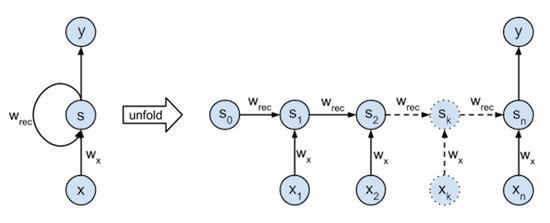


## 3. Backpropagation 실습

In [17]:
import numpy as np
np.random.seed(seed=1)

### 1) 데이터셋 만들기

In [37]:
# 샘플 개수
n_samples = 100
# 시퀀스 길이
len_sequence = 10
# 시퀀스 생성
X = np.zeros((n_samples, len_sequence))
for row_idx in range(n_samples):
    X[row_idx,:] = np.around(np.random.rand(len_sequence)).astype(int)
# 각 시퀀스의 타겟 생성
t = np.sum(X, axis=1)

### 2) Forward step으로 output 계산하기

* `update_state` 함수는 이전 상태 $S_{k-1}$ 와 현재 input $X_k$로부터 상태를 업데이트합니다. 이 때, input에 대한 학습 파라미터 $W_x$와 재귀적인 학습 파라미터 $W_{rec}$ 를 사용하여 계산합니다.

* `forward_states` 함수는 `update_state` 함수를 반복하면서 시점 $k$ 의 변화에 따른 상태 $S$ 를 계산합니다. 해당 RNN은 시작 시점에서 시퀀스로부터 input으로 받은 부분이 없기 때문에 초기 상태 $S_0$는 임의의 값 $0$으로 설정됩니다.

* `loss` 함수는 Mean Squared Error (MSE) 함수로 target $t$와 output $y$ 간의 손실 $\xi$를 output 합니다.

In [19]:
def update_state(xk, sk, wx, wRec):
    return xk * wx + sk * wRec

def forward_states(X, wx, wRec):
    # 모든 input 시퀀스 X 들에 대한 상태를 담고 있는 행렬 S 초기화
    S = np.zeros((X.shape[0], X.shape[1]+1))
    for k in range(0, X.shape[1]):
        # S[k] = S[k-1] * wRec + X[k] * wx
        S[:,k+1] = update_state(X[:,k], S[:,k], wx, wRec)
    return S

def loss(y, t): 
    return np.mean((t - y)**2)

# **TODO**

### 1) Backward step으로 gradient 계산하기

* `output_gradient` 함수는 RNN의 output $y$에 대한 loss $\xi$의 gradient $\partial \xi / \partial y$를 계산하는 것으로 시작합니다. 이 gradient 는 시점에 따라 - unfolded layer 를 거쳐 - output $y$ 에서부터 input $X$ 까지 전파됩니다. 해당 점화식을 다음과 같이 표현할 수 있습니다.
$$\frac{\partial \xi}{\partial S_{k-1}} = \frac{\partial \xi}{\partial S_k} \frac{\partial S_k}{\partial S_{k-1}} = \frac{\partial \xi}{\partial S_k} W_{rec}$$

* Backward propagation은 $n$ 개의 시점을 가진 RNN에 대해 다음과 같이 시작합니다.
$$\frac{\partial \xi}{\partial y} = \frac{\partial \xi}{\partial S_n}$$

* 학습 가능한 파라미터에 대한 손실 함수의 gradient는 각 layer의 파라미터의 gradient를 더해서 구할 수 있습니다. 

**TODO 1: 학습 가능한 파라미터에 대한 손실 함수의 gradient를 유도하기.**
$$\frac{\partial \xi}{\partial W_x} = \frac{\partial \xi}{\partial S_n}\frac{\partial S_n}{\partial S_k}\frac{\partial S_k}{\partial W_x}$$
$$\frac{\partial \xi}{\partial W_{rec}} = \frac{\partial \xi}{\partial y}\frac{\partial y}{\partial W_{rec}}$$


**TODO 2: 아래 TODO 란의 코드를 작성하기.**

In [86]:
def output_gradient(y, t):
    return 2. * (y - t)

def backward_gradient(X, S, grad_out, wRec):
    """
    X: input
    S: 모든 input 시퀀스에 대한 상태를 담고 있는 행렬
    grad_out: output의 gradient
    wRec: 재귀적으로 사용되는 학습 파라미터
    """
    # grad_over_time: loss의 state 에 대한 gradient 
    # 초기화
    grad_over_time = np.zeros((X.shape[0], X.shape[1]+1))
    grad_over_time[:, -1] = grad_out
    # gradient accumulations 초기화
    wx_grad = 0
    wRec_grad = 0
    '''
    TODO
    '''
    exp = 0
    for i in range(10,0,-1):
      wx_grad += np.mean(grad_out * X[:,i-1] * (wRec ** exp))
      exp += 1

    exp = 0
    for i in range(10,0,-1):
      wRec_grad += np.mean(grad_out * S[:,i-1] * (wRec ** exp))
      exp += 1

    return (wx_grad, wRec_grad), grad_over_time

### 2) 테스트 코드: Gradient Check

No gradient errors found 가 출력되면 성공입니다.

In [88]:
params = [1.2, 1.2]  # [wx, wRec]
eps = 1e-7
S = forward_states(X, params[0], params[1])
grad_out = output_gradient(S[:,-1], t)
backprop_grads, grad_over_time = backward_gradient(X, S, grad_out, params[1])
for p_idx, _ in enumerate(params):
    grad_backprop = backprop_grads[p_idx]
    params[p_idx] += eps
    plus_loss = loss(forward_states(X, params[0], params[1])[:,-1], t)
    params[p_idx] -= 2 * eps
    min_loss = loss(forward_states(X, params[0], params[1])[:,-1], t)
    params[p_idx] += eps
    grad_num = (plus_loss - min_loss) / (2*eps)
    if not np.isclose(grad_num, grad_backprop):
        raise ValueError((
            f'Numerical gradient of {grad_num:.6f} is not close to '
            f'the backpropagation gradient of {grad_backprop:.6f}!'))
print('No gradient errors found')

No gradient errors found
